In [1]:
!pip install SVM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep = ":::", names= ["TITLE", "GENRE", "DESCRIPTION"] , engine="python")

In [4]:
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
14386,Double Crossed (1917),drama,"Young Frank Stratton, the scion of a wealthy ..."
14387,The Stolen Christmas (2015),short,The Stolen Christmas - Don't Miss The End Car...
14388,Only Men Go to the Grave (2016),drama,"After the Iraq-Iran war ended in 1988, a blin..."
14389,Budz House (2011),comedy,"Meet Bud Howard, an endearing yet unemployed ..."


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14390 entries, 1 to 14390
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        14390 non-null  object
 1   GENRE        14390 non-null  object
 2   DESCRIPTION  14390 non-null  object
dtypes: object(3)
memory usage: 449.7+ KB


In [6]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,14390,14390,14390
unique,14390,27,14378
top,Oscar et la dame rose (2009),drama,A retired professor has returned to his estat...
freq,1,3591,3


In [7]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [8]:
test_path = "/content/train_data.txt"
test_data = pd.read_csv(train_path, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [9]:
test_data

,ID,TITLE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
14386,Double Crossed (1917),drama,"Young Frank Stratton, the scion of a wealthy ..."
14387,The Stolen Christmas (2015),short,The Stolen Christmas - Don't Miss The End Car...
14388,Only Men Go to the Grave (2016),drama,"After the Iraq-Iran war ended in 1988, a blin..."
14389,Budz House (2011),comedy,"Meet Bud Howard, an endearing yet unemployed ..."


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14390 entries, 1 to 14390
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           14390 non-null  object
 1   TITLE        14390 non-null  object
 2   DESCRIPTION  14390 non-null  object
dtypes: object(3)
memory usage: 449.7+ KB


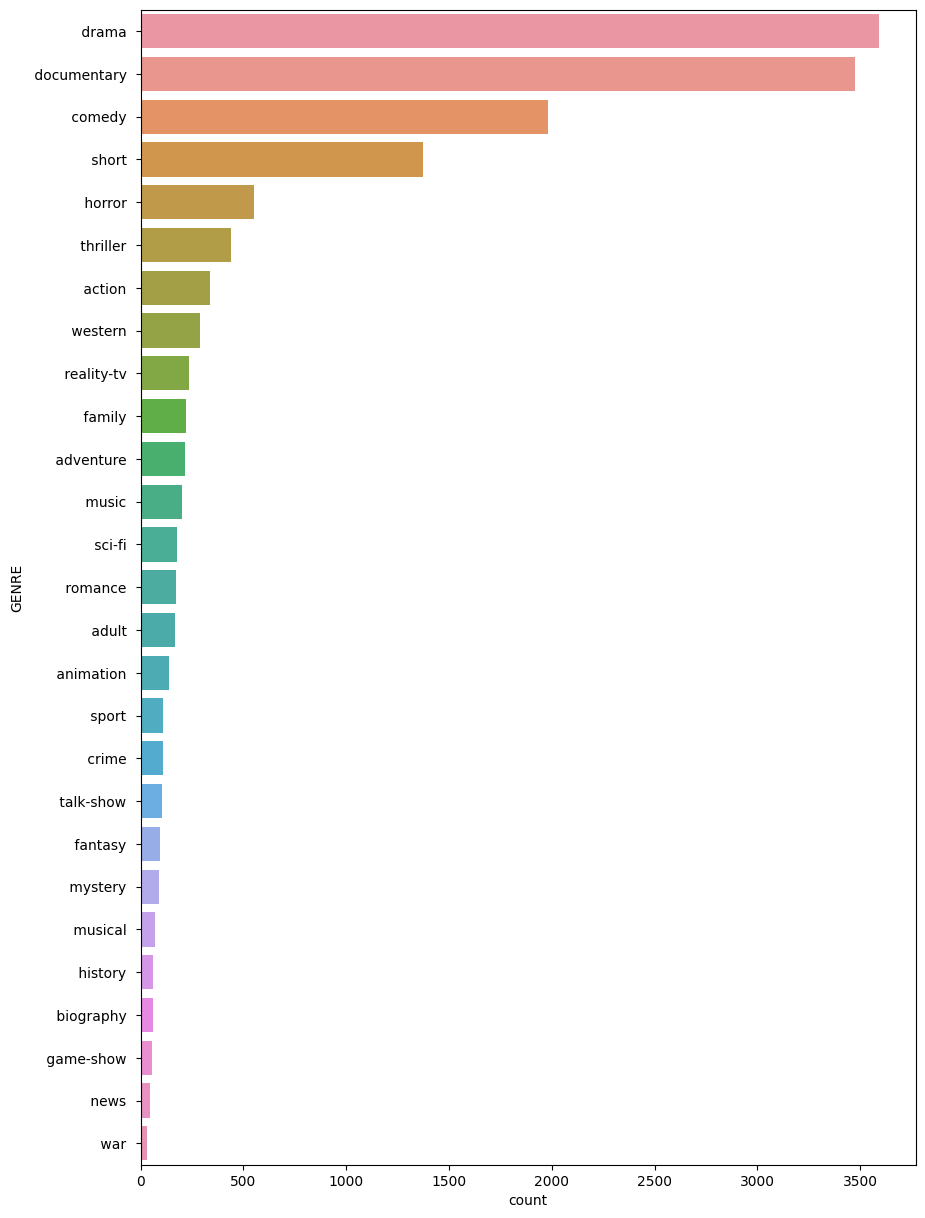

In [11]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

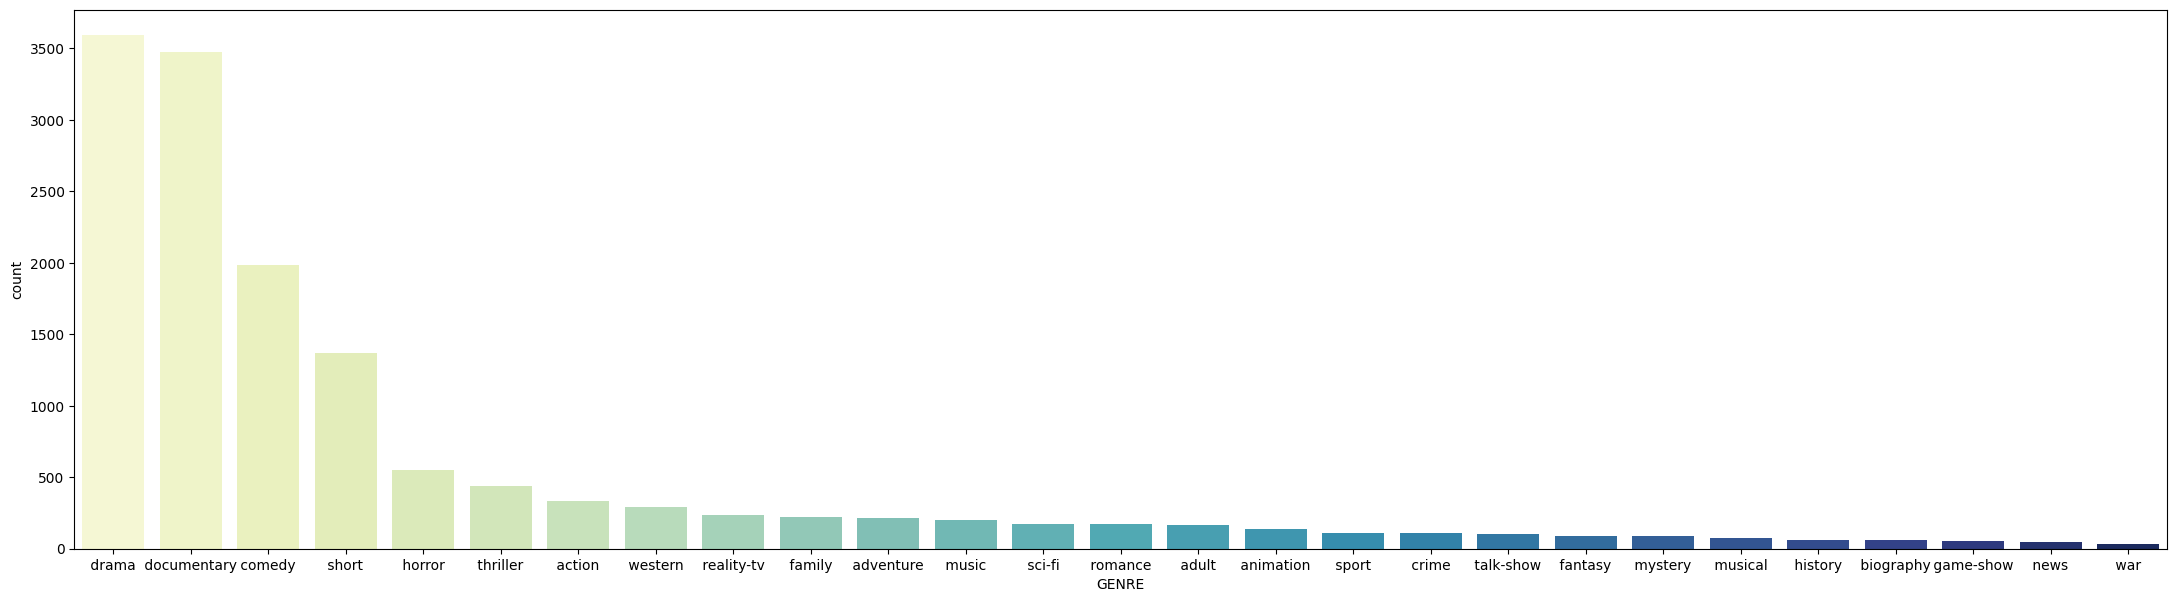

In [12]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "YlGnBu")
plt.show()

## **Data Processing**

In [14]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)

    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

In [16]:
train_data

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
14386,Double Crossed (1917),drama,"Young Frank Stratton, the scion of a wealthy ...",young frank stratton scion wealthy family temp...
14387,The Stolen Christmas (2015),short,The Stolen Christmas - Don't Miss The End Car...,stolen christmas miss end carol beautiful work...
14388,Only Men Go to the Grave (2016),drama,"After the Iraq-Iran war ended in 1988, a blin...",iraq iran war ended blind mother welcomes estr...
14389,Budz House (2011),comedy,"Meet Bud Howard, an endearing yet unemployed ...",meet bud howard endearing yet unemployed lazy ...


## **using TF_IDF to vectorize the data**

In [17]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(train_data["TextCleaning"])

X_test = vectorize.transform(test_data["TextCleaning"])

## **split data into train data and test data**

In [18]:
X = X_train
y = train_data["GENRE"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## **Train the Model**

In [19]:
model = SVC()

In [20]:
model.fit(X_train, Y_train)

SVC()

In [21]:
model.score(X_train, Y_train)

0.8931549687282835

In [22]:
y_pred = model.predict(X_test)
y_pred

array([' comedy ', ' documentary ', ' drama ', ..., ' documentary ',
       ' drama ', ' comedy '], dtype=object)

In [23]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.4975677553856845
